In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

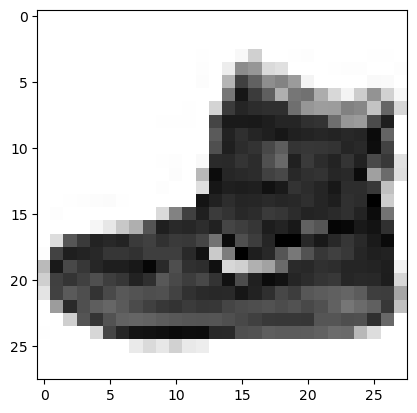

In [6]:
plt.imshow(X_train[0], cmap ="Greys")

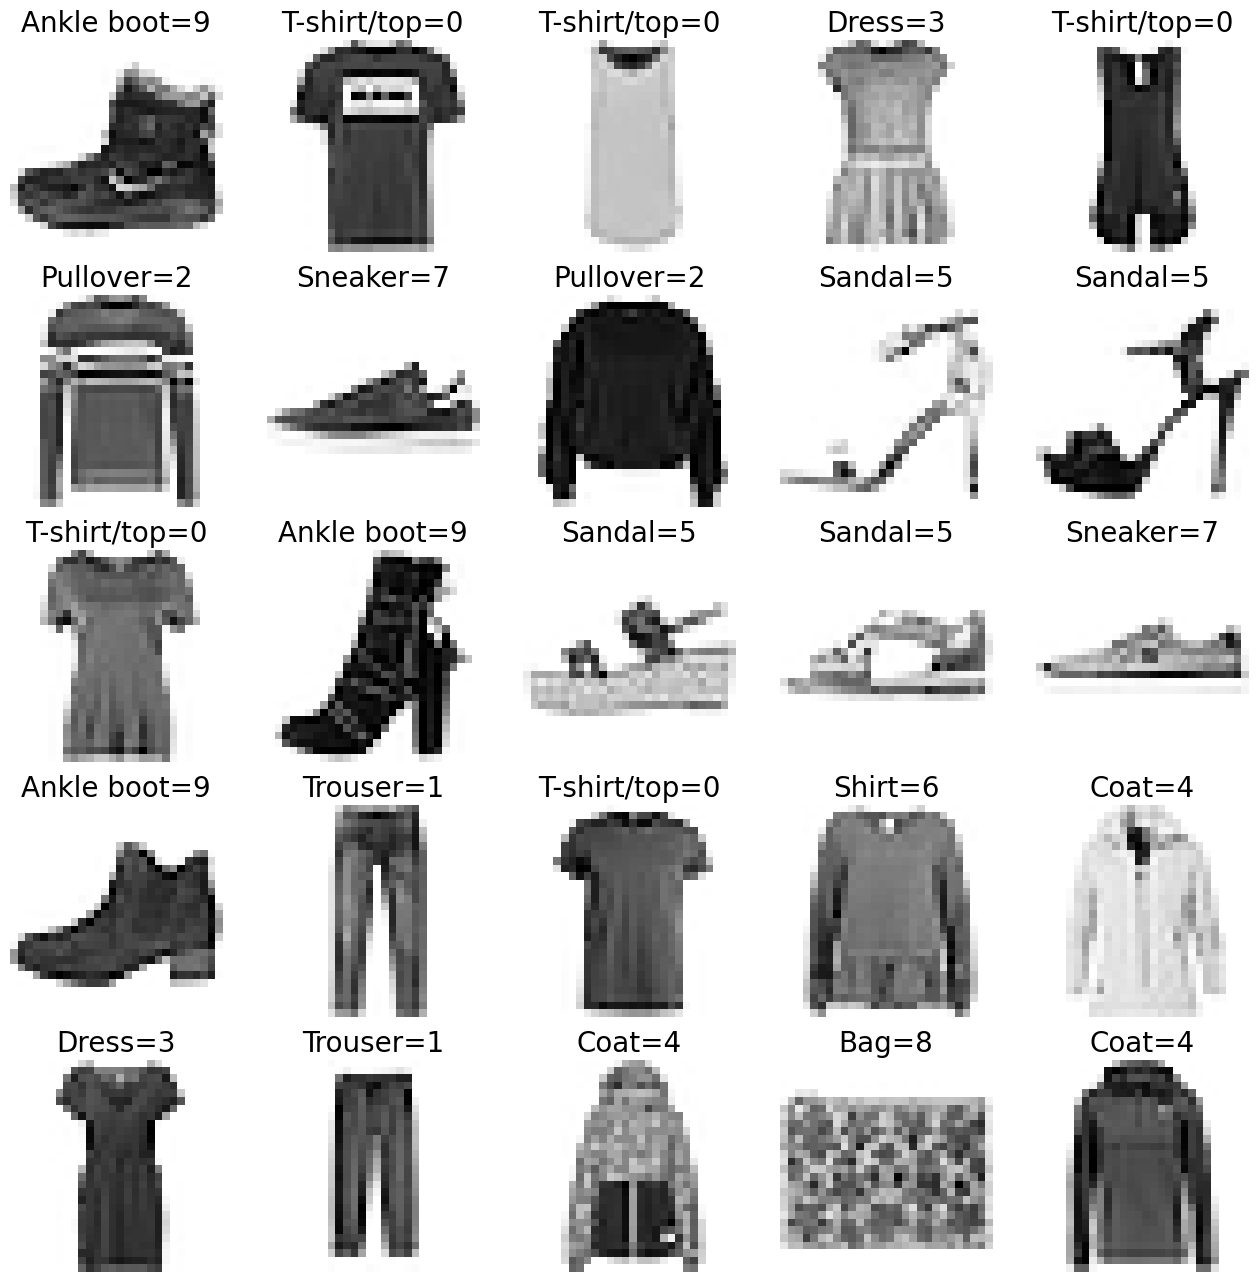

In [7]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)
 
  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

In [8]:
X_train = X_train/255
X_test = X_test/255

# Build Neural Network:-

In [9]:
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5480 - accuracy: 0.8099
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4036 - accuracy: 0.8588
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3725 - accuracy: 0.8666
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3498 - accuracy: 0.8735
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3348 - accuracy: 0.8782
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3217 - accuracy: 0.8821
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8852
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3031 - accuracy: 0.8895
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8911
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2

# Test and Evaluate Neural Network Model:-

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3482 - accuracy: 0.8758


[0.34824612736701965, 0.8758000135421753]

In [14]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
      dtype=float32)

In [16]:
np.argmax(y_pred[0].round(2))

9

In [17]:
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [18]:
y_test[0]

9

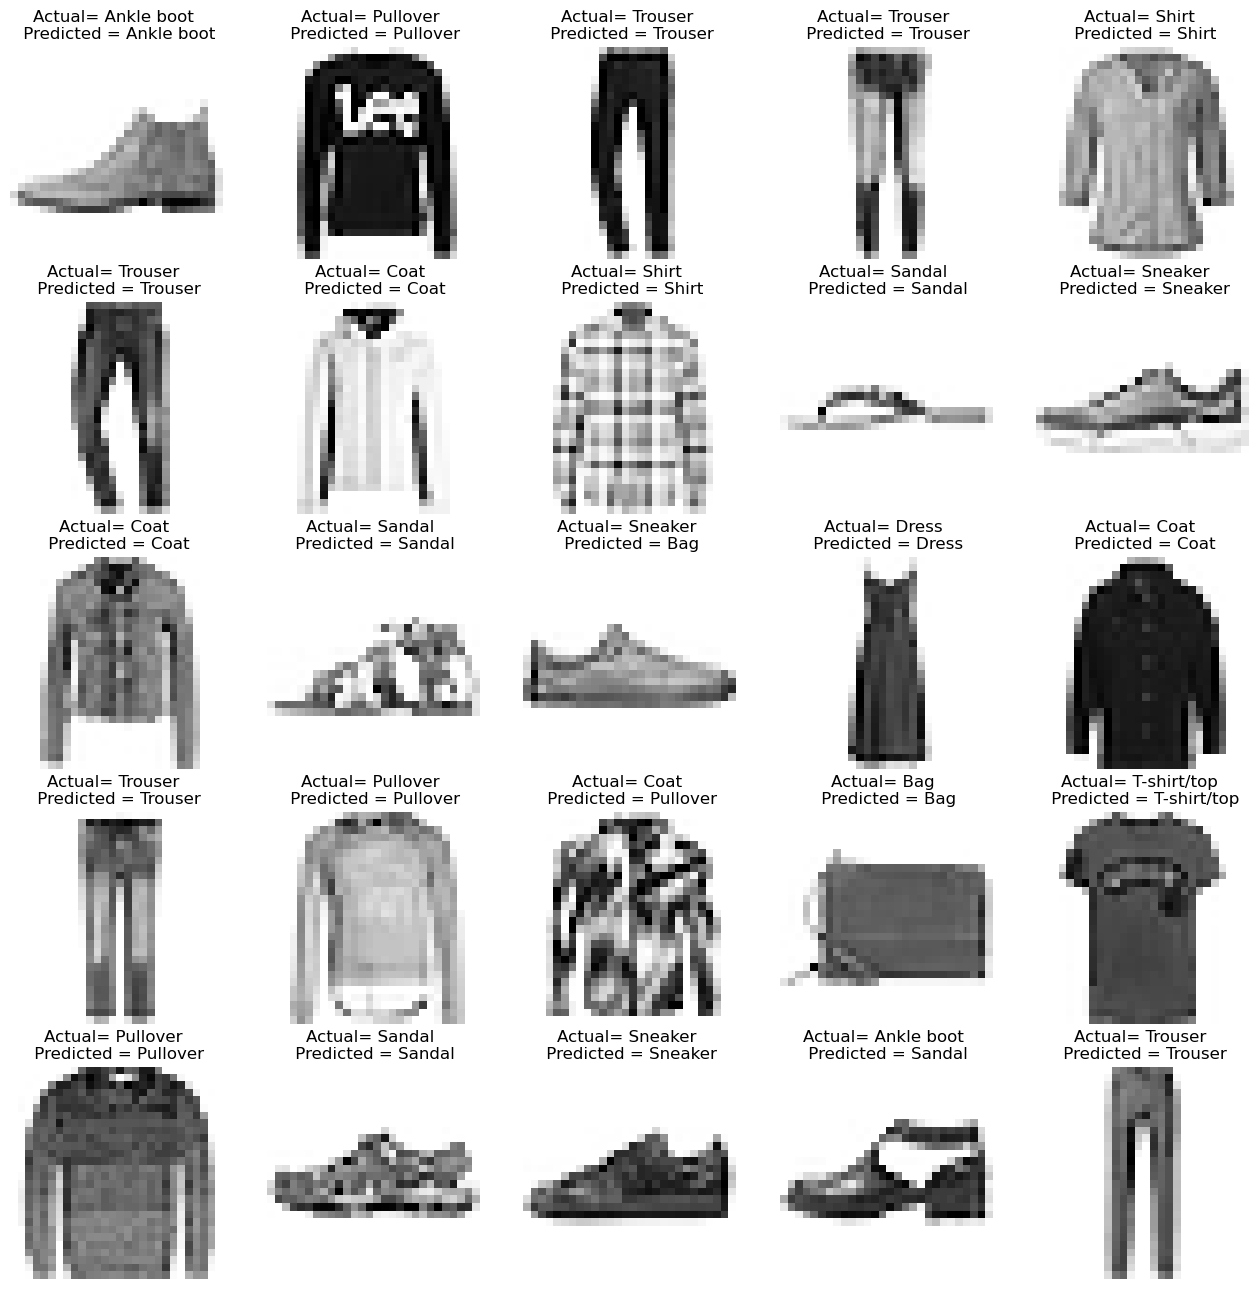

In [19]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

# Confusion Matrix:-

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

In [21]:
cm

array([[794,   2,  22,  45,   5,   0, 126,   0,   6,   0],
       [  2, 970,   0,  21,   4,   0,   3,   0,   0,   0],
       [  8,   0, 813,  14,  93,   0,  71,   0,   1,   0],
       [ 14,   6,  12, 906,  28,   0,  29,   0,   5,   0],
       [  0,   1, 103,  32, 793,   0,  69,   0,   2,   0],
       [  0,   0,   0,   2,   0, 937,   0,  32,   5,  24],
       [ 95,   0, 101,  46,  66,   0, 683,   0,   9,   0],
       [  0,   0,   0,   0,   0,  12,   0, 932,   1,  55],
       [  4,   0,   6,   4,   5,   2,  10,   3, 966,   0],
       [  0,   0,   0,   1,   0,   8,   1,  26,   0, 964]], dtype=int64)

<AxesSubplot:>

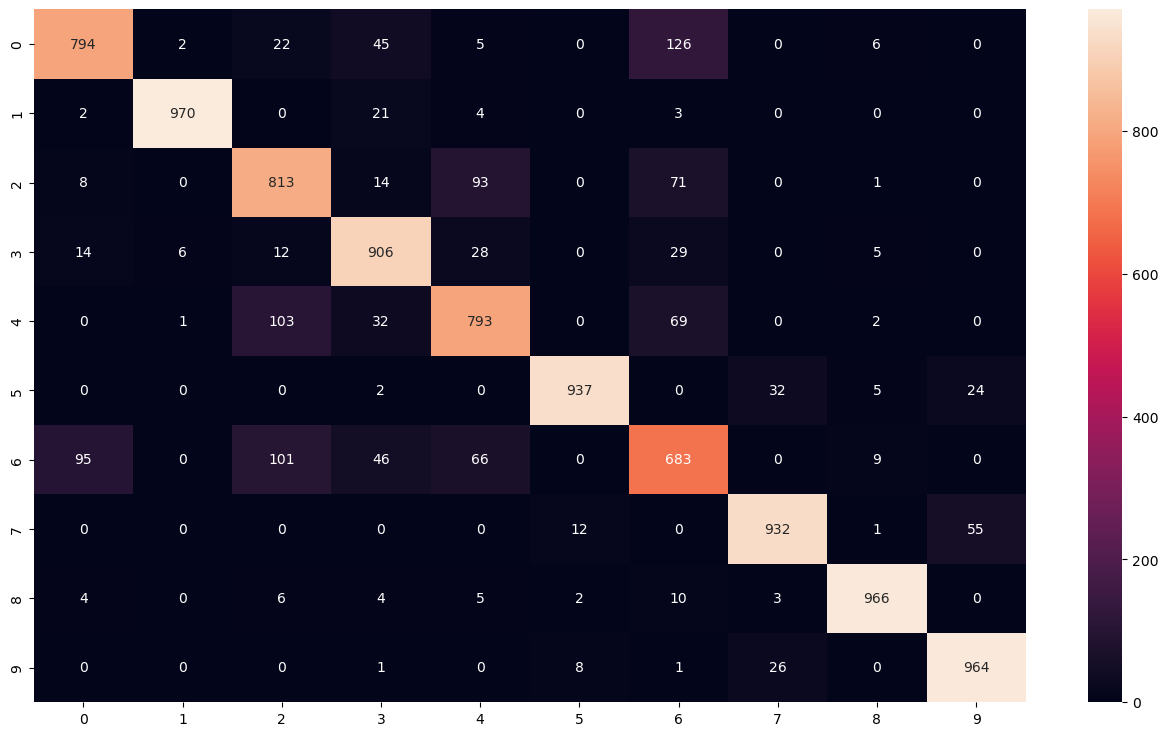

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

# Classification Report:-

In [23]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)
 
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.79      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.85      0.91      0.87      1000
        Coat       0.80      0.79      0.80      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.69      0.68      0.69      1000
     Sneaker       0.94      0.93      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Save Model:-

In [24]:
model.save("MNIST_classifier_nn_model.h5")
 
model = keras.models.load_model("MNIST_classifier_nn_model.h5")
 
model.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 2ms/step


array([[2.0606656e-05, 6.4263670e-09, 3.7556271e-07, ..., 1.1393277e-02,
        5.7608754e-06, 9.8639244e-01],
       [7.9422280e-06, 1.1038600e-13, 9.9774039e-01, ..., 1.0867032e-16,
        7.0727332e-08, 1.5818164e-12],
       [5.9891596e-07, 9.9999559e-01, 4.6857357e-07, ..., 1.6779258e-23,
        1.4503257e-10, 7.0167253e-12],
       ...,
       [4.6425126e-03, 2.6845798e-08, 5.6313573e-05, ..., 6.0776175e-09,
        9.9496824e-01, 4.3621374e-11],
       [6.9177651e-07, 9.9994743e-01, 1.7399579e-07, ..., 8.6946205e-13,
        1.9908923e-10, 7.3522273e-08],
       [4.1670582e-04, 3.1246095e-06, 1.3257751e-04, ..., 1.0409282e-02,
        3.8752196e-04, 1.0943858e-04]], dtype=float32)